<a href="https://colab.research.google.com/github/akashtepan/Online-Retail-Customer-Segmentation/blob/main/Shubham_Tepan_Notebook_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Regression
##### **Contribution**    - Shubham Tepan (Individual)

#**<b> Problem Description </b>**

###For this project, your goal is to uncover the major customer segments of a UK-based, non-store online retail business. The data set includes all transactions from 01/12/2010 to 09/12/2011, with the company specializing in unique all-occasion gifts. A lot of the buyers are wholesalers.

# **GitHub Link -**

#**<b> Data Description </b>**

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. 
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Importing Library**

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

#**Loading Data**

In [ ]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the drive onto the '/content/drive' directory
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read the dataset file
retail_df = pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx")

# **The EDA process starts with the following steps -**

In [ ]:
# Displaying the first 5 rows of the dataset
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Finding the number of rows and columns in the dataset
rows, columns = retail_df.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 541909 rows and 8 columns.


In [ ]:
# Storing the column names of the dataset in a variable
columns = retail_df.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
# Getting information about the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset has **541909** rows and **8** columns, but we have missing information in two of the columns. The **CustomerID** column has **406829** values, meaning that some information is missing. The same is true for the **Description** column. It's important to keep in mind these missing values when analyzing our dataset.

In [ ]:
# Calculate descriptive statistics for the retail data
# The describe function calculates various summary statistics of the data in the DataFrame
# The optional argument [0.75,0.95,0.99] calculates quantiles at the specified values

retail_df.describe([0.75,0.95,0.99])


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
95%,29.000000,9.950000,17905.000000
99%,100.000000,18.000000,18212.000000
max,80995.000000,38970.000000,18287.000000


When looking at the summary statistics generated by the describe function, it is apparent that some negative values exist in the data. These negative values might indicate that products were returned or cancelled. Another noteworthy observation is that the 99th percentile for both the UnitPrice and Quantity columns is low, while the maximum value is much higher. This suggests that there are outliers in the data, which could be due to the occasional purchase of valuable items. Additionally, the UnitPrice and Quantity columns are inversely related to each other.

# **Getting Unique Values**

In [ ]:
# Count the number of unique values in the InvoiceNo column
transactions = retail_df['InvoiceNo'].nunique()

# Count the number of unique values in the StockCode column
products_bought = retail_df['StockCode'].nunique()

# Count the number of unique values in the CustomerID column
customers = retail_df['CustomerID'].nunique()

# Calculate the percentage of missing customer information
missing_customers = round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df), 2)

# Count the number of unique values in the Country column
countries = retail_df['Country'].nunique()

# Print the results
print("Number of transactions: ", transactions)
print("Number of products bought: ", products_bought)
print("Number of customers:", customers)
print("Percentage of customers NA: ", missing_customers, "%")
print('Number of countries: ', countries)


Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Observation**: A significant portion of customer data is not available, indicated by the high number of NA values.

## **The number of unique items in the dataset.**

In [ ]:
# Get the unique values of the StockCode column
unique_stock_codes = retail_df.StockCode.unique()

# Get the shape (number of rows and columns) of the unique values of the StockCode column
stock_code_shape = unique_stock_codes.shape

# Print the result
print("Shape of unique values of StockCode column:", stock_code_shape)

Shape of unique values of StockCode column: (4070,)


In [ ]:
# Get the unique values in the Description column
unique_descriptions = retail_df.Description.unique()

# Get the number of unique values in the Description column
num_unique_descriptions = unique_descriptions.shape

# Print the result
print("Number of unique descriptions:", num_unique_descriptions[0])

Number of unique descriptions: 4224


## The descriptions of the items in the dataset show that there are more descriptions than stock codes, meaning that some stock codes have multiple descriptions associated with them.

# **Stockcode which have more than one description**

In [ ]:
# Group the retail data by the StockCode and Description columns
cat_des_df = retail_df.groupby(["StockCode", "Description"]).count().reset_index()

In [ ]:
# Get the StockCode value counts where the count is greater than 1
# Reset the index and get the first 10 rows
head_stock_codes = (cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts() > 1]
                    .reset_index().head(10))

# Show the result
head_stock_codes

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,85172,5
5,72807A,5
6,23343,5
7,23131,5
8,21181,5
9,21829,4


**Example of one such stockcode**

In [ ]:
# Get the 7th most common StockCode
selected_stock_code = cat_des_df.StockCode.value_counts().reset_index()['index'][6]

# Get the unique descriptions for the selected stock code
unique_descriptions = retail_df[retail_df['StockCode'] == selected_stock_code]['Description'].unique()

# Print the result
print("Unique descriptions for stock code", selected_stock_code, ":", unique_descriptions)

Unique descriptions for stock code 23343 : ['JUMBO BAG VINTAGE CHRISTMAS ' 'came coded as 20713'
 'wrongly coded 20713' '20713 wrongly marked' 20713]


# **Examining invoices that have been Cancelled.**

##We will look for invoices with the letter "c" in the InvoiceNo column to see if there is an invoice with the quantity of -80995. If so, this would confirm our hypothesis that negative quantities correspond to cancelled orders.

In [ ]:
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]

# Display the first 5 rows of 'cancelled_orders' dataframe
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# Find a transaction where the quantity is -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


##As expected, negative values in the Quantity column indicate that the order was cancelled.

# **Let's see how many cancelled orders there are in the data set.**

In [ ]:
# Get the number of unique invoice numbers in the retail_df DataFrame
total_orders_count = retail_df['InvoiceNo'].nunique()

# Get the number of rows in the cancelled_orders DataFrame
cancelled_orders_count = len(cancelled_orders)

# Calculate the percentage of cancelled orders as a fraction of the total number of orders
cancelled_orders_percentage = cancelled_orders_count / total_orders_count * 100

# Print the results
print(f"Number of cancelled orders: {cancelled_orders_count}")
print(f"Percentage of cancelled orders: {cancelled_orders_percentage:.2f}%")

Number of cancelled orders: 9288
Percentage of cancelled orders: 35.86%


##Observation : A large number of orders, 35.86%, were cancelled. Analyzing these cancelled orders could help prevent cancellations in the future.

# **Determine the top 10 countries with the most cancelled orders.**

In [ ]:
# Determine the number of cancelled orders for each country
cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()

# Sort the country-wise count of cancelled orders in descending order and get the top 10 countries
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


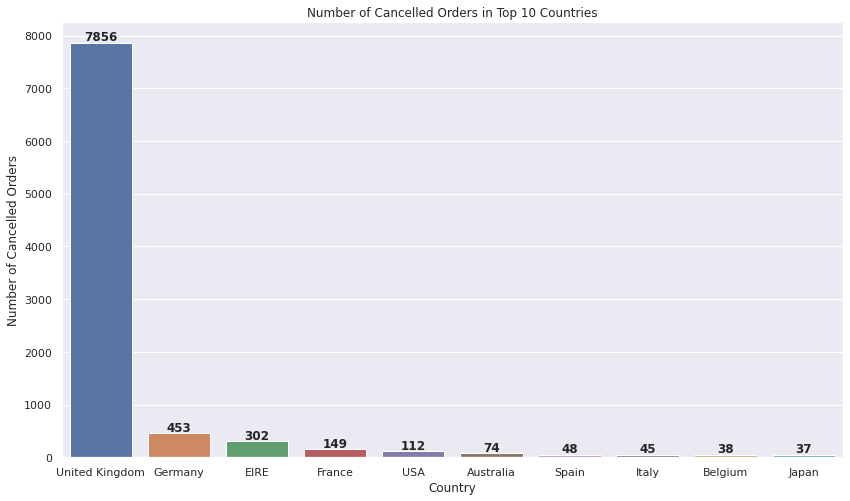

In [ ]:
# Set the size of the figure to be displayed
plt.figure(figsize=(14,8))

# Plot the bar chart using Seaborn
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top10)

# Add annotations on the bar charts
for i, v in enumerate(cancel_order_country_top10['InvoiceNo']):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')

# Add labels and title to the chart
plt.xlabel('Country') # Label for the x-axis
plt.ylabel('Number of Cancelled Orders') # Label for the y-axis
plt.title('Number of Cancelled Orders in Top 10 Countries') # Title for the chart

# Show the plot
plt.show()

#**Average Number of Orders per Customer**

In [ ]:
# Group the retail data by customer ID and count the number of unique invoices for each customer ID
groupby_customers = pd.DataFrame(retail_df.groupby("CustomerID")["InvoiceNo"].nunique())

# Display the first 5 rows of the resulting dataframe
print(groupby_customers.head())

            InvoiceNo
CustomerID           
12346.0             2
12347.0             7
12348.0             4
12349.0             1
12350.0             1


In [ ]:
# Display summary statistics for the groupby_customers dataframe
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


#**Observation :** On average, each customer places 5 orders.

### Based on our findings from descriptive statistics, the average purchase quantity per customer is 10. But are these purchases from the same product? Let's investigate the number of different products purchased.

In [ ]:
# Group the retail_df dataframe by InvoiceNo and CustomerID
temp_df = retail_df.groupby(['InvoiceNo','CustomerID'], as_index=False)

# Count the number of products in each invoice
temp_df = temp_df['InvoiceDate'].count()

# Rename the column 'InvoiceDate' to 'Number of products'
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})

# Print the result
print(transaction_df.head())

  InvoiceNo  CustomerID  Number of products
0    536365     17850.0                   7
1    536366     17850.0                   2
2    536367     13047.0                  12
3    536368     13047.0                   4
4    536369     13047.0                   1


In [ ]:
# Getting descriptive statistics 
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


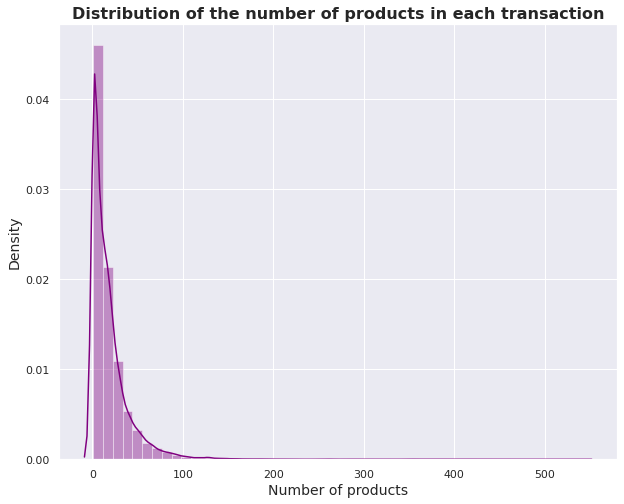

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the distribution of the number of products in each transaction
sns.distplot(transaction_df['Number of products'], color='purple')

# Add a title to the plot
plt.title("Distribution of the number of products in each transaction", fontsize=16, fontweight='bold')

# Add a label to the x-axis
plt.xlabel("Number of products", fontsize=14)

# Add a label to the y-axis
plt.ylabel("Density", fontsize=14)

# Show the plot
plt.show()

##The distribution of the number of products in each transaction is heavily skewed. The majority of customers purchase fewer than 25 items in a single transaction.

# **Cleaning Dataset**

In [ ]:
# Missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = retail_df.isnull().sum().sort_values(ascending = False)
    percent = round(retail_df.isnull().sum()/len(retail_df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(retail_df))

              Total  Percent
CustomerID   135080    24.93
Description    1454     0.27
InvoiceNo         0     0.00
StockCode         0     0.00
Quantity          0     0.00
InvoiceDate       0     0.00
UnitPrice         0     0.00
Country           0     0.00


In [ ]:
# Make a copy of the original retail data dataframe
retail_df_copy = retail_df.copy()

## **Removing the Cancelled order.**

In [ ]:
# Filter the copied dataframe to only include rows where the 'Quantity' column is greater than 0
retail_df_copy = retail_df_copy[retail_df_copy['Quantity'] > 0]

# Check the shape of the filtered dataframe
print("Number of rows:", retail_df_copy.shape[0], "Number of columns:", retail_df_copy.shape[1])

Number of rows: 531285 Number of columns: 8


## **Removing NA values.**

In [ ]:
# Remove all rows with missing values in the 'CustomerID' column
retail_df_copy.dropna(subset=['CustomerID'], how='all', inplace=True)

# Check the shape of the updated dataframe
print(retail_df_copy.shape)

(397924, 8)


In [ ]:
# Check for missing values in the copied dataframe after removing NA values in 'CustomerID' column
retail_df_copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Removing Duplicates**

In [ ]:
# Check for duplicates in the retail dataframe
retail_df.duplicated().sum()

5268

In [ ]:
# remove duplicates in place in the retail_df_copy dataframe
retail_df_copy.drop_duplicates(inplace=True)

In [ ]:
# Checking shape after cleaning
retail_df_copy.shape

(392732, 8)

## Exploring the unique values of each attribute

In [ ]:
print("Summary..")

# Get the column names in the dataframe
column_names = retail_df_copy.columns

# Loop through each column name
for column_name in column_names:
    # Get the number of unique values in the column
    unique_values = retail_df_copy[column_name].nunique()
        
    # Print the summary for the column
    print("Attribute:", column_name)
    print("Number of unique values:", unique_values)

Summary..
Attribute: InvoiceNo
Number of unique values: 18536
Attribute: StockCode
Number of unique values: 3665
Attribute: Description
Number of unique values: 3877
Attribute: Quantity
Number of unique values: 302
Attribute: InvoiceDate
Number of unique values: 17286
Attribute: UnitPrice
Number of unique values: 441
Attribute: CustomerID
Number of unique values: 4339
Attribute: Country
Number of unique values: 37


## **A new column, 'total_cost', was created which is the total cost of the products.**

In [ ]:
# create a new column 'total_cost' in the dataframe 'retail_df_copy'
retail_df_copy['total_cost'] = retail_df_copy['Quantity'] * retail_df_copy['UnitPrice']

In [ ]:
# display the first 5 rows of the dataframe 'retail_df_copy'
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# **Let us see what is the total revenue generated from customers in each country.**

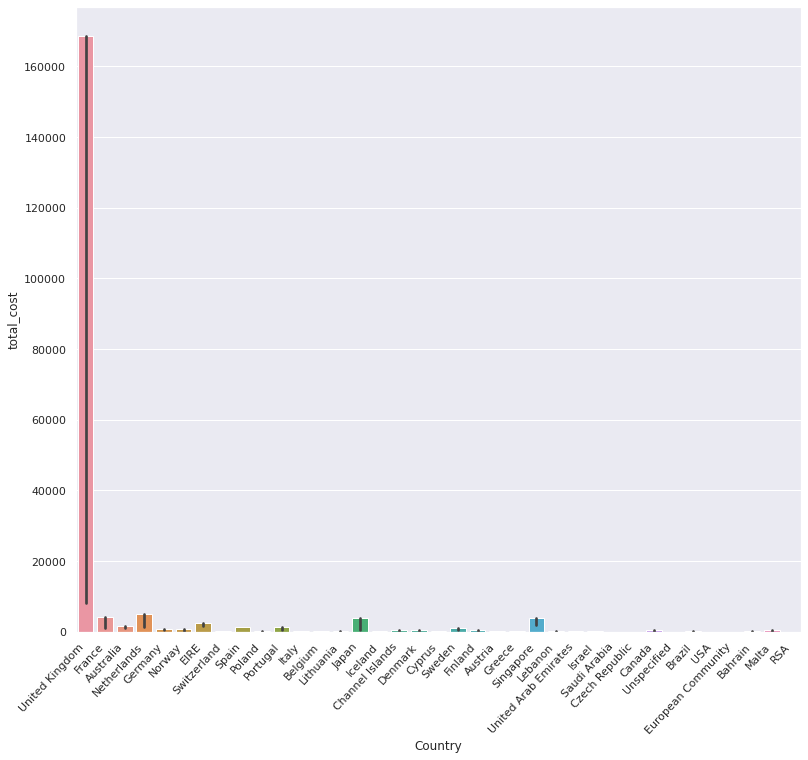

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Set the size of the figure
fig.set_size_inches(13, 11.5)

# Create a bar plot using seaborn
ax = sns.barplot(x='Country', y='total_cost', data=retail_df_copy, estimator=max, ax=ax)

# Rotate the x-axis labels by 47 degrees and align them to the right
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")

# Show the plot
plt.show()

In [ ]:
# The total revenue for each country
retail_df_copy.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4254037,1037945.864,5.429898e+09,7285024.644
Netherlands,200937,6247.730,3.407895e+07,285446.340
EIRE,140383,32134.960,1.065794e+08,265262.460
Germany,119156,33499.580,1.141791e+08,228678.400
France,111429,36788.980,1.055687e+08,208934.310
Australia,84199,3605.750,1.474610e+07,138453.810
Spain,27944,9492.390,3.201771e+07,61558.560
Switzerland,30083,6389.270,2.332474e+07,56443.950
Belgium,23237,7372.850,2.524670e+07,41196.340


In [ ]:
# Count the number of unique customers in the UK
retail_df_copy[retail_df_copy['Country'] == 'United Kingdom']['CustomerID'].nunique()

3921

###We can conclude that not only does the UK generate the highest sales revenues, but it also has the most customers. By exploring this further, we can gain insight into what products customers purchase together, as well as potential future opportunities in the UK market.

In [ ]:
# Getting descriptive statistics for largest Market i.e, UK
retail_df_copy[retail_df_copy['Country'] == 'United Kingdom'].describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,349227.000000,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625,20.860428
std,191.797470,17.990307,1594.403077,328.406035
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14191.000000,4.200000
50%,4.000000,1.950000,15518.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.850000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
# Checking unique summary for UK market
# Select only the rows where the country is 'United Kingdom'
uk_data = retail_df_copy[retail_df_copy['Country'] == 'United Kingdom']

# Count the number of unique transactions in the UK
transaction_count = uk_data['InvoiceNo'].nunique()

# Count the number of unique products in the UK
product_count = uk_data['StockCode'].nunique()

# Count the number of unique customers in the UK
customer_count = uk_data['CustomerID'].nunique()

# Print the results
print("Number of transactions in the UK:", transaction_count)
print("Number of products bought in the UK:", product_count)
print("Number of customers in the UK:", customer_count)

Number of transactions in the UK: 16649
Number of products bought in the UK: 3645
Number of customers in the UK: 3921


#**Proportion of orders from each Country**

In [ ]:
# Extract the unique values of the 'Country' column in the retail_df_copy DataFrame
unique_countries = retail_df_copy['Country'].unique()

# Print the unique values of the 'Country' column
print(unique_countries)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
# Count the number of occurrences of each unique value in the 'Country' column of the retail_df_copy DataFrame
country_counts = retail_df_copy['Country'].value_counts()

# Print the resulting Series
print(country_counts)

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Create a new DataFrame with the top countries
top_countries = pd.DataFrame(retail_df_copy['Country'].value_counts().sort_values(ascending = False).reset_index())

# Calculate the percentage of orders for each country
top_countries['Country %'] = top_countries['Country'] * 100 / retail_df_copy['Country'].count()

# Rename the columns in the DataFrame
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'}, inplace = True)

# Display the top 5 rows of the DataFrame
top_countries.head()

,Country,Total Counts,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474


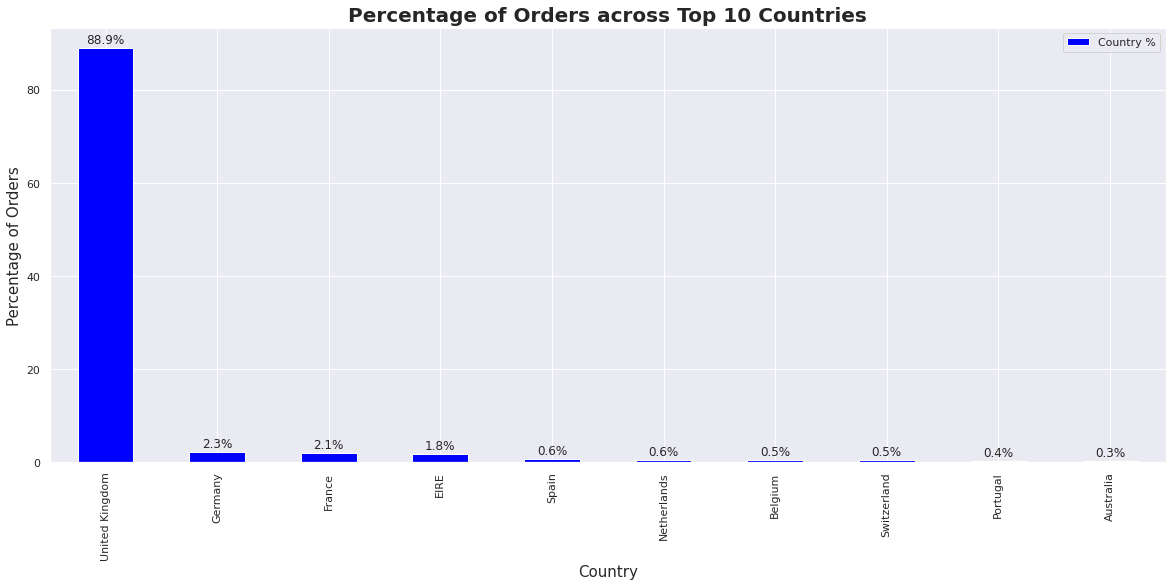

In [ ]:
# Limit the DataFrame to only show the top 10 countries
top_countries = top_countries.head(10)

# Plot the top 10 countries as a bar chart
top_countries.plot(x='Country', y='Country %', kind='bar', figsize=(20, 8), color='blue')

# Add the title, x-axis label, and y-axis label
plt.title('Percentage of Orders across Top 10 Countries', size=20, fontweight='bold')
plt.xlabel('Country', size=15)
plt.ylabel('Percentage of Orders', size=15)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add the percentage value on top of each bar
for i in range(top_countries.shape[0]):
    plt.text(x=i, y=top_countries['Country %'][i]+1, s=f"{top_countries['Country %'][i]:.1f}%", ha='center')

# Show the plot
plt.show()

#**Top Customers**

In [ ]:
# Creating a dataframe of top customers by number of transactions
top_customers = pd.DataFrame(retail_df_copy['CustomerID'].value_counts().sort_values(ascending = False).reset_index())

# Renaming columns in the dataframe
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)

# Displaying the top 5 customers
top_customers.head(5)

,CustomerID,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


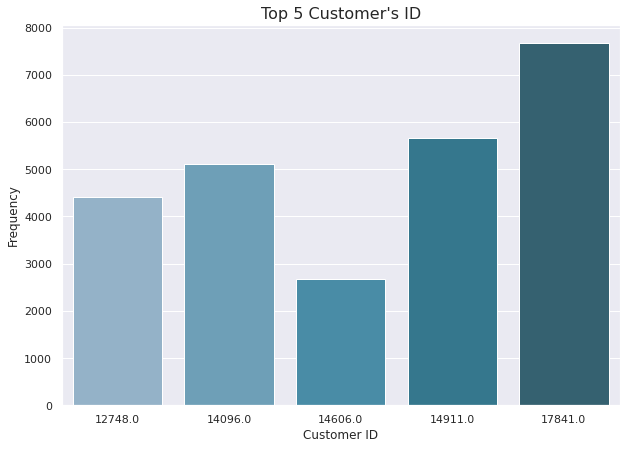

In [ ]:
# Increase the figure size
plt.figure(figsize = (10,7))

# Use a different color palette
sns.set_palette('PuBuGn_d')

# Create the bar plot
sns.barplot(x = 'CustomerID',y = 'count',data = top_customers[:5])

# Add labels and a title
plt.xlabel('Customer ID', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title("Top 5 Customer's ID", fontsize = 16)

# Show the plot
plt.show()

# **The spread of customers throughout a twelve-month period.**

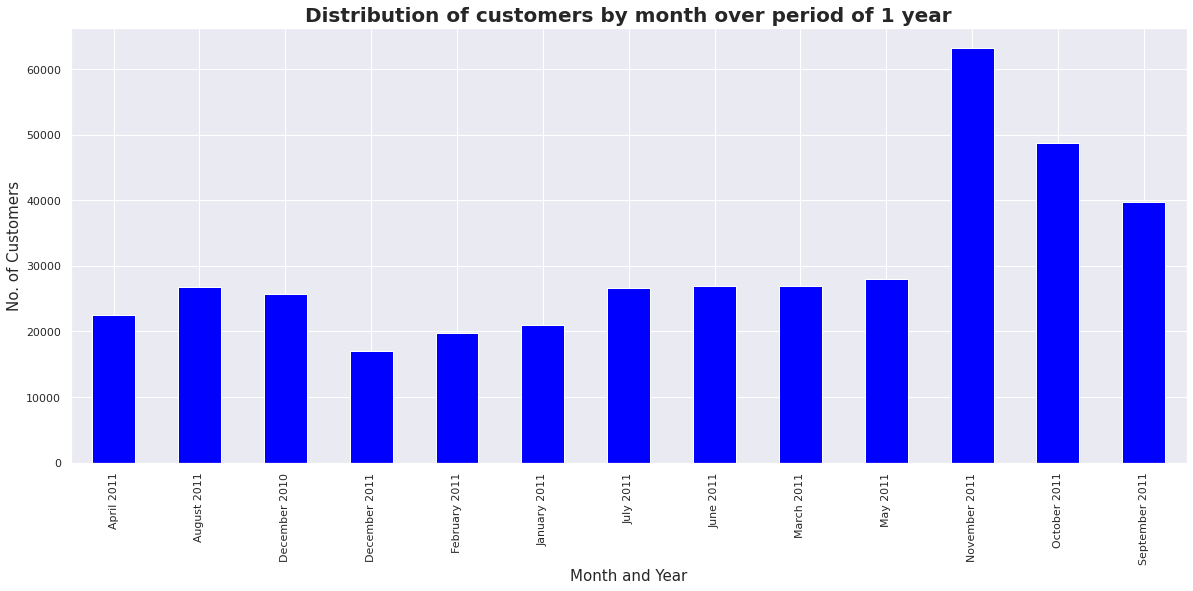

In [ ]:
# Create a figure with specified size
plt.figure(figsize=(20,8))

# Group the retail_df_copy dataframe by the month and year of the InvoiceDate column
# Count the number of unique CustomerID values in each group
monthly_customer_distribution = retail_df_copy.groupby(retail_df_copy['InvoiceDate'].dt.strftime('%B %Y'))['CustomerID'].count()

# Plot the customer distribution as a bar chart
monthly_customer_distribution.plot(kind='bar', color='blue')

# Set the title and labels for the x and y axes
plt.title('Distribution of customers by month over period of 1 year', size=20, fontweight='bold')
plt.xlabel('Month and Year', size=15)
plt.ylabel('No. of Customers', size=15)

# Show the plot
plt.show()

###**The majority of customers, at 88.92%, are from the United Kingdom. Other significant customer groups include Germany (2.30%), France (2.12%), Eire (1.84%), and Spain (0.63%). The remaining customers come from countries such as the Netherlands, Belgium, Switzerland, Portugal, and Australia.**

#**Top Selling products**

In [ ]:
# Group the data by product name and calculate the sum of the quantity sold for each product
product_group = retail_df_copy.groupby('Description').sum()['Quantity']

# Sort the data in descending order
product_group = product_group.sort_values(ascending=False)

# Select the top 10 items
top_10_selling_products = product_group.index[:10]

# Create a new dataframe to store the top 10 selling products
top_10_products_df = pd.DataFrame({'Product': top_10_selling_products, 'Quantity Sold': product_group.values[:10]})

# Print the result
top_10_products_df

,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706
5,ASSORTED COLOUR BIRD ORNAMENT,35263
6,PACK OF 72 RETROSPOT CAKE CASES,33670
7,POPCORN HOLDER,30919
8,RABBIT NIGHT LIGHT,27153
9,MINI PAINT SET VINTAGE,26076


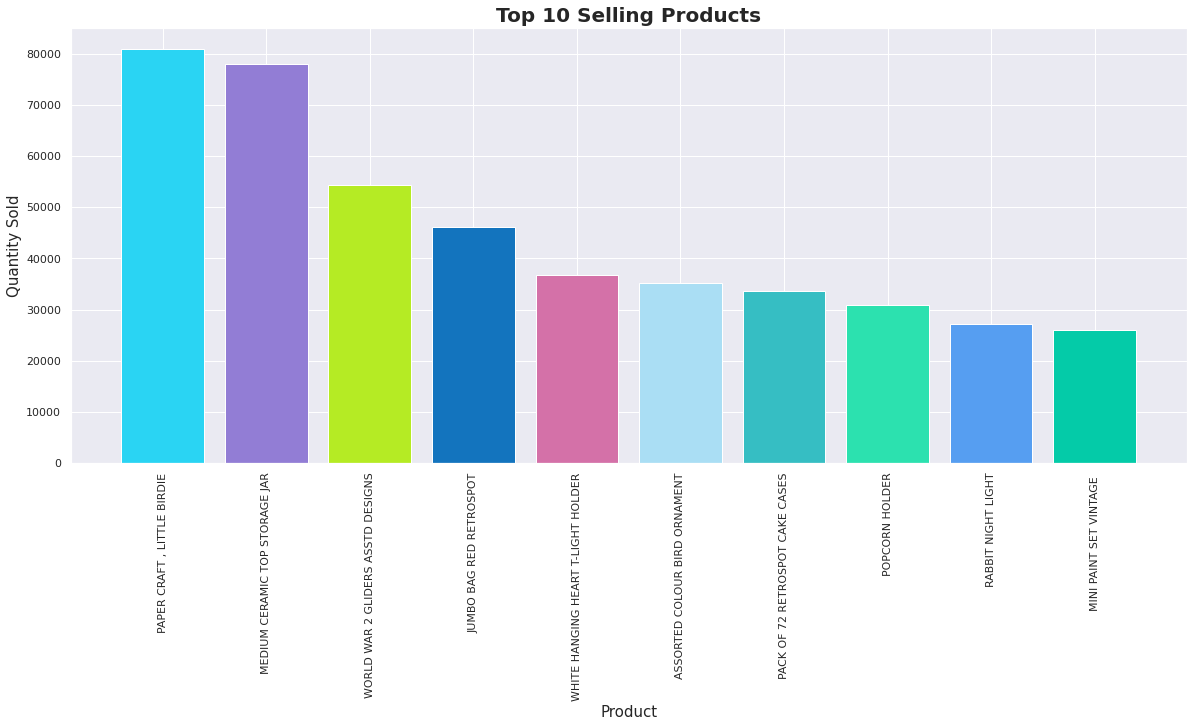

In [ ]:
import random

# Generate a list of random colors
colors = [tuple(random.random() for i in range(3)) for j in range(len(top_10_products_df))]

# Plot the bar chart
plt.figure(figsize=(20, 8))
plt.bar(top_10_products_df['Product'], top_10_products_df['Quantity Sold'], color=colors)

# Set the title and axis labels
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
plt.xlabel('Product', size=15)
plt.ylabel('Quantity Sold', size=15)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the chart
plt.show()

# **Least Selling Products**

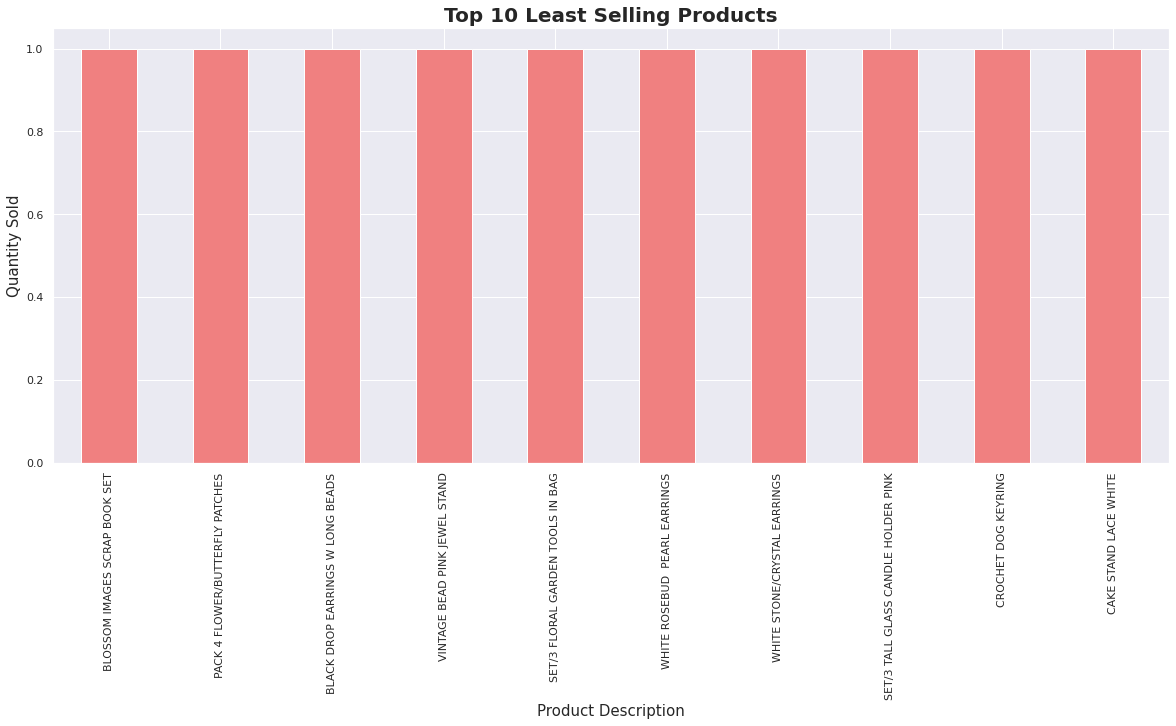

,Quantity,UnitPrice,CustomerID,total_cost
Description,,,,
BLOSSOM IMAGES SCRAP BOOK SET,1,4.95,14723.0,4.95
PACK 4 FLOWER/BUTTERFLY PATCHES,1,1.25,12748.0,1.25
BLACK DROP EARRINGS W LONG BEADS,1,2.95,14570.0,2.95
VINTAGE BEAD PINK JEWEL STAND,1,4.95,16904.0,4.95
SET/3 FLORAL GARDEN TOOLS IN BAG,1,7.95,14083.0,7.95
WHITE ROSEBUD PEARL EARRINGS,1,2.55,15856.0,2.55
WHITE STONE/CRYSTAL EARRINGS,1,2.95,17364.0,2.95
SET/3 TALL GLASS CANDLE HOLDER PINK,1,12.75,17999.0,12.75
CROCHET DOG KEYRING,1,1.65,14461.0,1.65


In [ ]:
# Get the top 10 least selling products
least_selling_products = retail_df_copy.groupby('Description').sum().sort_values('Quantity', ascending=True).head(10)

# Plot the top 10 least selling products as a bar chart
least_selling_products['Quantity'].plot(kind='bar', figsize=(20, 8), color='lightcoral')

# Set the title, x-label, and y-label for the chart
plt.title('Top 10 Least Selling Products', size=20, fontweight='bold')
plt.xlabel('Product Description', size=15)
plt.ylabel('Quantity Sold', size=15)
plt.xticks(rotation=90)

# Show the chart
plt.show()

# Top 10 Least Selling Products
least_selling_products

# **Quantity Distribution**

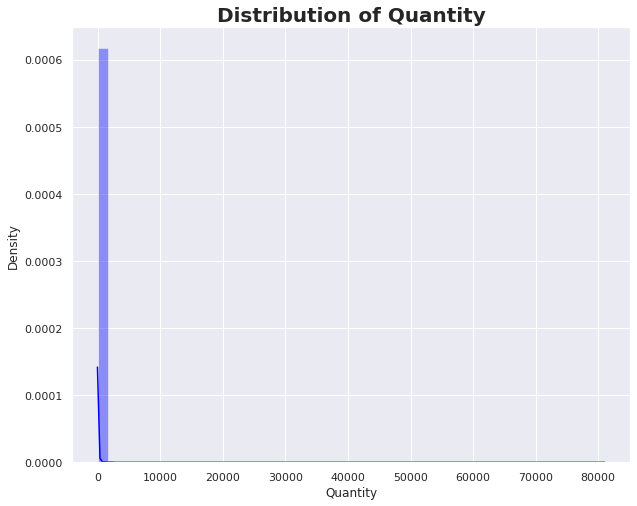

In [ ]:
#Distribution of Quantity
# Set the figure size for the plot
plt.figure(figsize=(10,8))

# Set the plot title
plt.title('Distribution of Quantity', size=20, fontweight='bold')

# Plot the distribution of Quantity data
sns.distplot(retail_df_copy['Quantity'], color='blue')

# Display the plot
plt.show()

### We can observe that the distribution of quantity is highly positively skewed. To remove this skewness, we can apply the log transformation to the data.

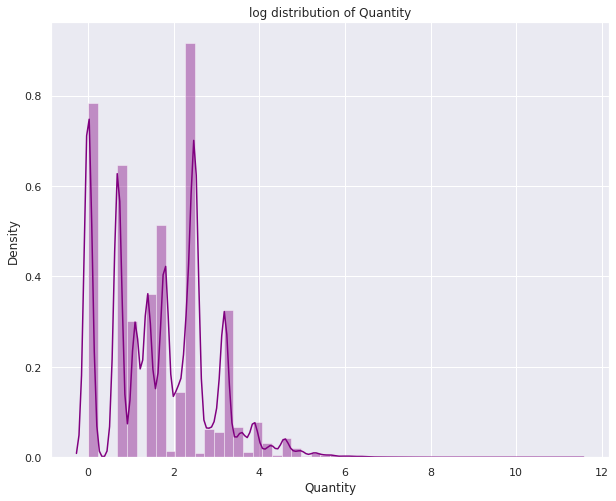

In [ ]:
# plotting log distribution of Quantity
plt.figure(figsize=(10,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(retail_df_copy['Quantity']),color="purple")

# **Feature Engineering**

##**Convert the column InvoiceDate to datetime format.**

In [ ]:
#Convert the InvoiceDate column to a datetime data type
retail_df_copy["InvoiceDate"] = pd.to_datetime(retail_df_copy["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

## **Create new features, Day and Month, from the InvoiceDate.**

In [ ]:
# Create a new column named 'Day' in the retail_df_copy dataframe
retail_df_copy['Day'] = retail_df_copy['InvoiceDate'].dt.day_name()

In [ ]:
# Create a new column named 'Month' in the retail_df_copy dataframe
retail_df_copy['Month'] = retail_df_copy['InvoiceDate'].dt.month_name()

## **Create new features from the Invoice Date such as Hours, Year, Month Number, and Day Number.**

In [ ]:
# Create a new feature 'year' that contains the year of the InvoiceDate
retail_df_copy["year"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.year)

# Create a new feature 'month_num' that contains the number of the month of the InvoiceDate
retail_df_copy["month_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.month)

# Create a new feature 'day_num' that contains the number of the day of the month of the InvoiceDate
retail_df_copy["day_num"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.day)

# Create a new feature 'hour' that contains the hour of the day of the InvoiceDate
retail_df_copy["hour"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.hour)

# Create a new feature 'minute' that contains the minute of the hour of the InvoiceDate
retail_df_copy["minute"] = retail_df_copy["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# Check the head of the dataset after extracting new features from existing features
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,Day,Month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26


In [ ]:
# Check the shape of the retail_df_copy dataframe after creating new features
shape = retail_df_copy.shape
print("The shape of the retail_df_copy dataframe is:", shape)

The shape of the retail_df_copy dataframe is: (392732, 16)


# **Distribution of Unit Price**

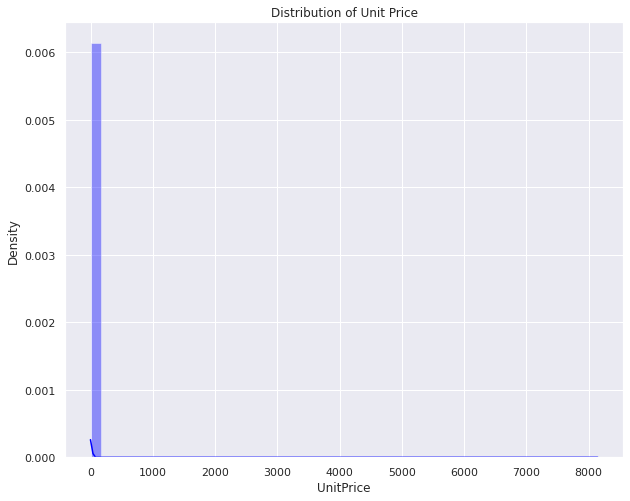

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10,8))

# Set the title for the plot
plt.title('Distribution of Unit Price')

# Plot the distribution of the UnitPrice column using the seaborn distplot function
sns.distplot(retail_df_copy['UnitPrice'], color='blue')

# Show the plot
plt.show()

# **Distribution of total_cost**

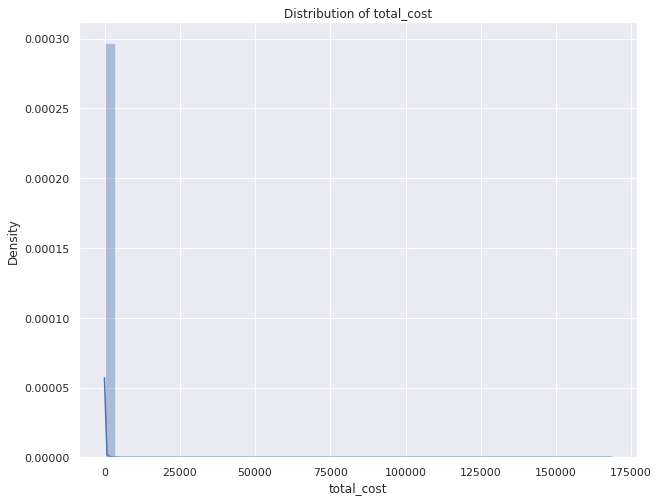

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10,8))

# Set the title for the plot
plt.title('Distribution of total_cost')

# Plot the distribution of the total_cost column using the distplot method from seaborn
sns.distplot(retail_df_copy['total_cost'],color="B")

# Show the plot
plt.show()

# **Distribution of Total Cost after log transformation**

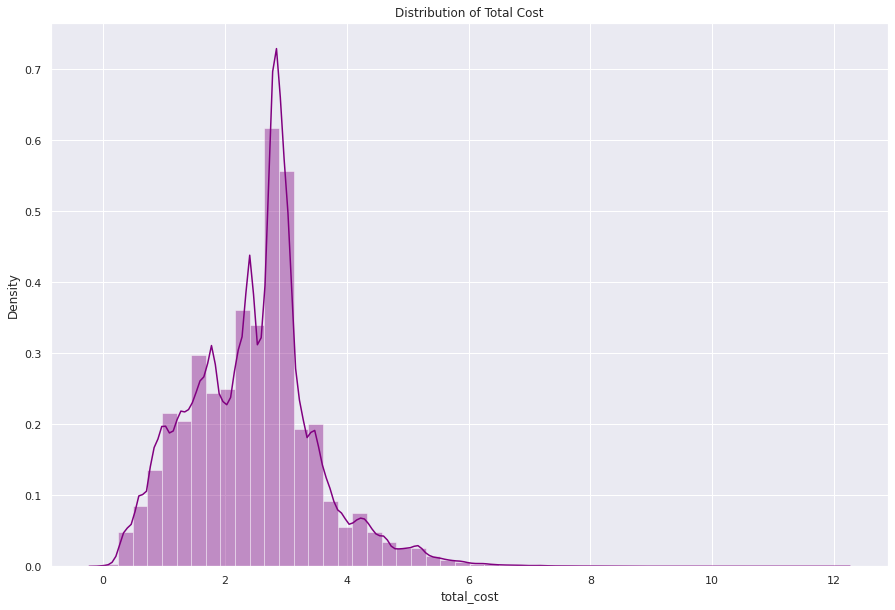

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(15,10))

# Set the title of the plot
plt.title('Distribution of Total Cost')

# Plot the distribution of the log transformed total_cost column using a distplot from the seaborn library
sns.distplot(np.log1p(retail_df_copy['total_cost']), color="purple")

# Show the plot
plt.show()

### After taking the log transformation of total_Cost, we observed that the distribution is now normally distributed. This is because the unit price and quantity of the product are inversely proportional, and both were highly positively skewed before the transformation.

In [ ]:
# Remove rows where the value in the 'UnitPrice' column is less than or equal to 0
retail_df_copy = retail_df_copy[retail_df_copy['UnitPrice'] > 0]

In [ ]:
# Get descriptive statistics for the total_cost column in the retail_df_copy DataFrame
retail_df_copy['total_cost'].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: total_cost, dtype: float64

# **Purchasing on different Days**

In [ ]:
# Create a new DataFrame with the count of each unique day of the week
day_df = retail_df_copy['Day'].value_counts().reset_index()

# Rename the 'index' column to 'Day_Name'
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)

# Rename the 'Day' column to 'Count'
day_df.rename(columns={'Day': 'Count'}, inplace=True)

# Print the resulting DataFrame
day_df

,Day_Name,Count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


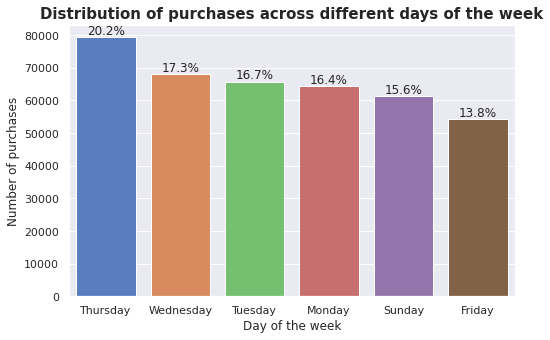

In [ ]:
# Plotting the distribution of purchases across different days of the week
plt.figure(figsize=(8,5))
sns.barplot(x='Day_Name', y='Count', data=day_df, palette="muted")

# Adding percentage value on top of each bar
for i in range(day_df.shape[0]):
    value = day_df['Count'][i]
    percent = '{:.1f}%'.format(value/day_df['Count'].sum() * 100)
    plt.text(i, value, percent, ha='center', va='bottom', size=12)

# Adding title and labels
plt.title('Distribution of purchases across different days of the week', size=15, fontweight='bold')
plt.xlabel('Day of the week', size=12)
plt.ylabel('Number of purchases', size=12)

# Show the plot
plt.show()

# **Purchasing on different Months**

In [ ]:
# Count the number of purchases for each month in the retail_df_copy DataFrame
month_df = retail_df_copy['Month'].value_counts().reset_index()

# Rename the 'index' column to 'Month_Name'
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)

# Rename the 'Month' column to 'Count'
month_df.rename(columns={'Month': 'Count'}, inplace=True)

# Show the resulting DataFrame
month_df

,Month_Name,Count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


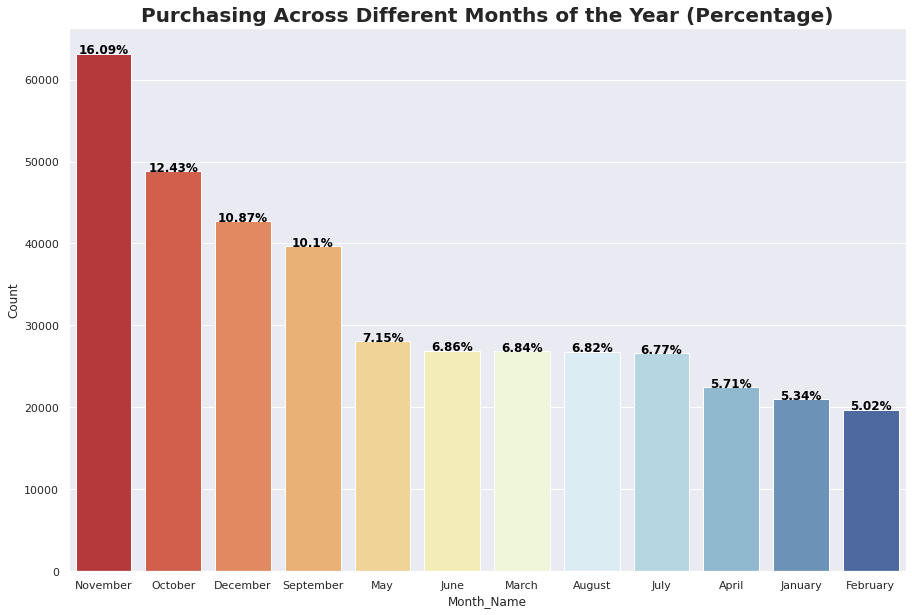

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(15,10))

# Plot the purchase counts for each month as a bar plot
ax = sns.barplot(x='Month_Name', y='Count', data=month_df, palette='RdYlBu')

# Add the percentage values in the middle of each bar
for i, v in enumerate(month_df['Count']):
    ax.text(i, v, str(round(v / month_df['Count'].sum() * 100, 2)) + '%', color='black', ha='center', fontweight='bold')

# Set the title of the plot
plt.title('Purchasing Across Different Months of the Year (Percentage)', size=20, fontweight='bold')

# Show the plot
plt.show()

# **Purchasing across different hours of the day**

In [ ]:
# Count the number of transactions for each hour of the day
hour_df = retail_df_copy['hour'].value_counts().reset_index()

# Rename the 'index' column to 'Hour_Name'
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)

# Rename the 'hour' column to 'Count'
hour_df.rename(columns={'hour': 'Count'}, inplace=True)

# Display the hour_df DataFrame
hour_df

,Hour_Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


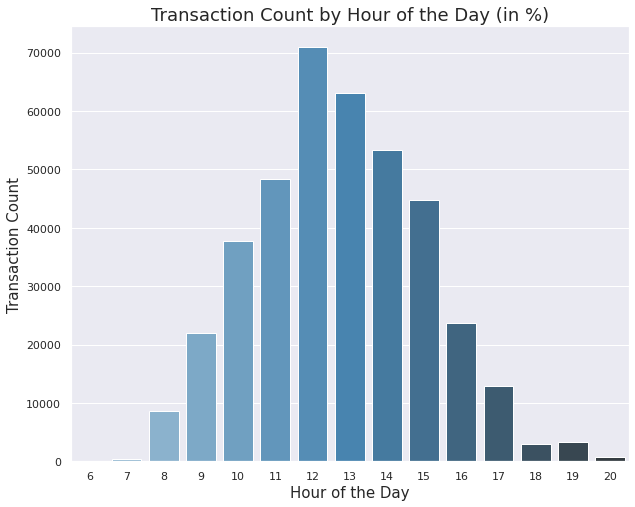

In [ ]:
# Create a barplot of the count of transactions versus the hour of the day
plt.figure(figsize=(10,8))
plt.title('Transaction Count by Hour of the Day (in %)', fontsize=18)
sns.barplot(x='Hour_Name', y='Count', data=hour_df, palette='Blues_d')

# Set x and y labels
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Transaction Count', fontsize=15)

# Show the plot
plt.show()

### The following code segments the hours of a day into three different time frames - "Morning", "Afternoon", and "Evening" - and adds a new column, named Time_type, to the retail_df_copy dataframe. 

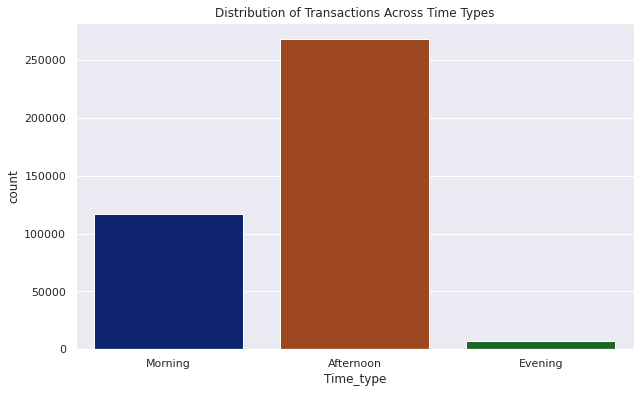

In [ ]:
# Defining a function to categorize the hours into three time types - Morning, Afternoon and Evening
def categorize_hours(hour):
    if hour in [6, 7, 8, 9, 10, 11]:
        return 'Morning'
    elif hour in [12, 13, 14, 15, 16, 17]:
        return 'Afternoon'
    else:
        return 'Evening'

# Adding a new column 'Time_type' to the dataframe by applying the categorize_hours function on the 'hour' column
retail_df_copy['Time_type'] = retail_df_copy['hour'].apply(categorize_hours)

# Plotting a countplot to visualize the distribution of transactions across different time types
plt.figure(figsize=(10, 6))
plt.title('Distribution of Transactions Across Time Types')
sns.countplot(x='Time_type', data=retail_df_copy, palette="dark")

# Showing the plot
plt.show()

# **RFM Analysis**

RFM analysis is a marketing technique that segments customers based on their recency (time since last purchase), frequency (number of purchases), and monetary value (amount spent) of their transactions. This helps businesses understand their customers better and make data-driven decisions about marketing and customer engagement.

## **Creating Recency Attributes**

In [ ]:
# Import the time and warnings modules from the Python Standard Library
import time
import warnings

# Import the datetime module as "dt" for easier use
import datetime as dt

In [ ]:
# Get the maximum value of the 'InvoiceDate' column
last_date = retail_df_copy['InvoiceDate'].max()

# Output the result
print(last_date)

2011-12-09 12:50:00


In [ ]:
# Create a date object representing December 9th, 2011
now = dt.date(2011, 12, 9)

# Print the date object
print(now)

2011-12-09


In [ ]:
# Create a new column called 'date' in the 'retail_df_copy' DataFrame
retail_df_copy['date'] = retail_df_copy['InvoiceDate'].dt.date

# Extract the date component of the 'InvoiceDate' column in the DataFrame
# The '.dt' accessor is used to access the datetime attributes of the 'InvoiceDate' column
# The '.date' attribute returns the date component of the datetime value

In [ ]:
# Display the first 5 rows of the DataFrame
retail_df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,Day,Month,year,month_num,day_num,hour,minute,Time_type,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning,2010-12-01


In [ ]:
# Group the data by customer ID and find the most recent purchase date for each customer
recency_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['date'].max()

# Rename the columns in the resulting dataframe to reflect the customer ID and most recent purchase date
recency_df.columns = ['CustomerID','LastPurchaseDate']

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [ ]:
# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [ ]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

# **Creating Frequency Attributes**

In [ ]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = retail_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()

# Rename the columns in the resulting dataframe to reflect the customer ID and purchase frequency
frequency_df.columns = ['CustomerID','Frequency']

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


# **Creating Monetary Attributes**

In [ ]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = retail_df_copy.groupby(by='CustomerID', as_index=False)['total_cost'].sum()

# Rename the columns in the resulting dataframe to reflect the customer ID and total amount spent
monetary_df.columns = ['CustomerID','MonetaryValue']

# Display the first few rows of the dataframe to inspect the results
monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.

In [ ]:
# Merge the recency and frequency dataframes on the customer ID column
temp_df = recency_df.merge(frequency_df, on='CustomerID')

# Merge the monetary value dataframe on the customer ID column
rfm_df = temp_df.merge(monetary_df, on='CustomerID')

# Display the first few rows of the resulting dataframe to inspect the results
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q=[0.25,0.5,0.75])

# Print the quantile values for inspection
print(quantiles)

      Recency  Frequency  MonetaryValue
0.25    17.00       17.0       306.4825
0.50    50.00       41.0       668.5700
0.75   141.75       98.0      1660.5975


In [ ]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

# Print the dictionary for inspection
print(quantiles_dict)

{0.25: {'Recency': 17.0, 'Frequency': 17.0, 'MonetaryValue': 306.48249999999996}, 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 668.57}, 0.75: {'Recency': 141.75, 'Frequency': 98.0, 'MonetaryValue': 1660.5974999999999}}


# **Creating RFM table and calculating RFM Score**

In [ ]:
# Assigning quantile labels to Recency, Frequency and MonetaryValue
quantile_labels = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']

# Creating RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(4, 0, -1)))

# Creating FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Creating MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [ ]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [ ]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [ ]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending=False)

In [ ]:
rfm_df2.head(10)


,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1689,14646.0,1,2076,280206.02,4,4,4,444
4201,18102.0,0,431,259657.30,4,4,4,444
3728,17450.0,8,336,194390.79,4,4,4,444
1879,14911.0,1,5670,143711.17,4,4,4,444
1333,14156.0,9,1395,117210.08,4,4,4,444
3771,17511.0,2,963,91062.38,4,4,4,444
3176,16684.0,4,277,66653.56,4,4,4,444
1289,14096.0,4,5111,65164.79,4,4,4,444
996,13694.0,3,568,65039.62,4,4,4,444
2176,15311.0,0,2366,60632.75,4,4,4,444


In [ ]:
# Categorising customer or making customer segmentation based on RFM Score
print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore']==4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore']=='111']))

Best Customers:  443
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  105
Lost Customers:  22
Lost Cheap Customers:  381


## With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [ ]:
# Dropping the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['FrequencyScore','RecencyScore','MonetaryScore','RFMScore'], axis=1)

# Setting the customer id as index of the dataframe
rfm_data.set_index("CustomerID", inplace=True)

# Printing the first 5 rows of the updated dataframe
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


# **Feature Correlations**

In [ ]:
# Calculate the correlation between the variables
correlation = rfm_data.corr()

# Display the correlation matrix
correlation

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206501,-0.121975
Frequency,-0.206501,1.000000,0.425282
MonetaryValue,-0.121975,0.425282,1.000000


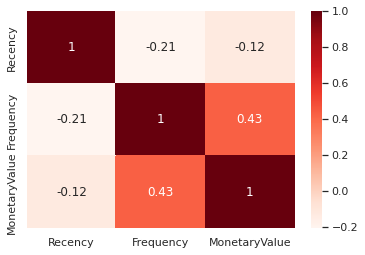

In [ ]:
# Plotting the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot=True, cmap='Reds')

### We observe that there is a negative correlation between Recency and both Frequency and Monetary. On the other hand, the correlation between Monetary and Frequency is positive, but it is still not a strong correlation.


# **Plot the distribution of Recency, Frequency, and MonetaryValue.**

A scatter matrix is a visual representation of the relationships between multiple variables or features in a dataset. It can help identify patterns, trends, and correlations between the variables. It is a useful tool for exploratory data analysis and can help provide insight into the data.

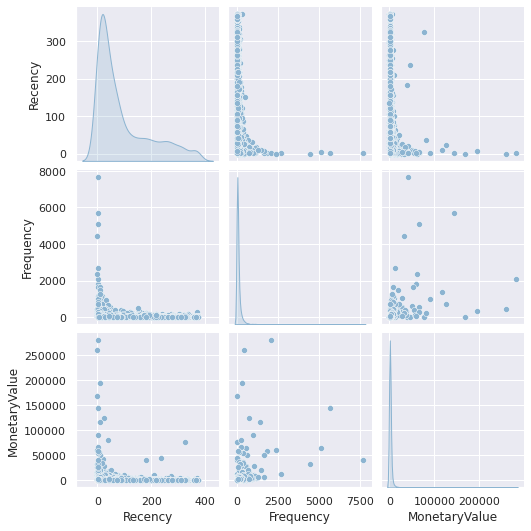

In [ ]:
#Visualizing the distribution of features in the dataset using Seaborn.
sns.pairplot(rfm_data, diag_kind='kde')

In [ ]:
#The skew() method is used to measure the asymmetry of the data around the mean. 
rfm_data.skew()

Recency           1.245826
Frequency        18.043530
MonetaryValue    19.339368
dtype: float64

We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

# **Data Normalization**

In [ ]:
# Calculate the logarithmic values of the Recency and Monetary features
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)  # logarithmic value of the Recency feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)  # logarithmic value of the Monetary feature
rfm_f_log = np.log(rfm_data['Frequency'])  # calculate the natural log of the 'Frequency' column

In [ ]:
# Create a dictionary with the logarithmic values of the Monetary, Recency, and Frequency features
data = {
    'Monetary': rfm_m_log,  # logarithmic value of the Monetary feature
    'Recency': rfm_r_log,   # logarithmic value of the Recency feature
    'Frequency': rfm_f_log  # logarithmic value of the Frequency feature
}

# Create a pandas DataFrame from the dictionary
log_data = pd.DataFrame(data)
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


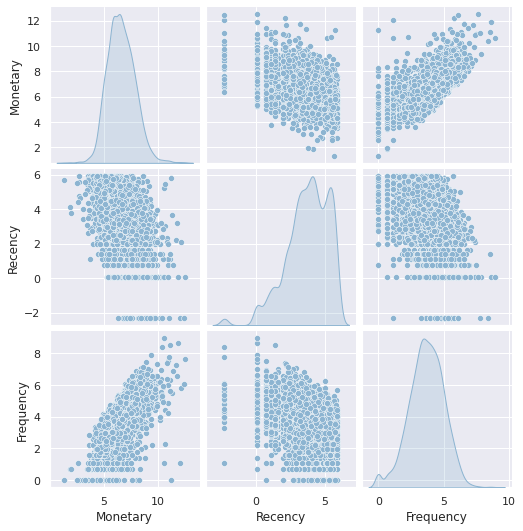

In [ ]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data
sns.pairplot(data=log_data, diag_kind='kde') 

In [ ]:
# Calculate the skewness of each feature in the data
log_data.skew() 

Monetary     0.385332
Recency     -0.869633
Frequency   -0.217968
dtype: float64

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

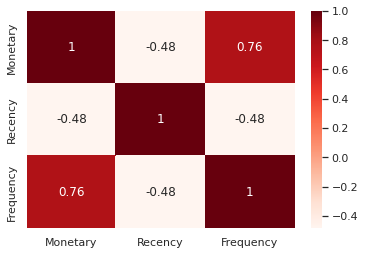

In [ ]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(),annot=True, cmap='Reds')

In [ ]:
 # use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.483551,0.757412
Recency,-0.483551,1.000000,-0.479347
Frequency,0.757412,-0.479347,1.000000


## The correlation between Monetary and Frequency is now stronger.





In [ ]:
# Assign the normalized data to a variable "X"
X = log_data

# **Modelling**

# **K-means Implementation**

### K-means is a clustering algorithm that groups data points into K clusters. Choosing the right number of clusters can be challenging. The Silhouette Coefficient can be used to evaluate the quality of the clusters by measuring the similarity of each data point to its assigned cluster. A high Silhouette Score indicates a good quality cluster. To ensure a high-quality solution, k-means++ should be used for initialization.

In [ ]:
# Importing Libraries
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

## **1.1 Silhouette Score**

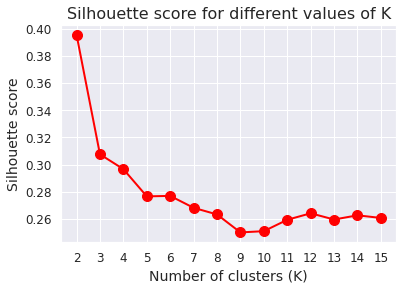

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Your data
X = X

silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
    # Initialize the KMeans model with the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    
    # Fit the KMeans model to the data
    kmeans.fit(X)
    
    # Predict the cluster labels for each data point
    labels = kmeans.labels_
    
    # Calculate the silhouette score for this solution
    silhouette = silhouette_score(X, labels)
    
    # Append the silhouette score to the array
    silhouette_scores.append(silhouette)
    
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the input data X to the KMeans model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

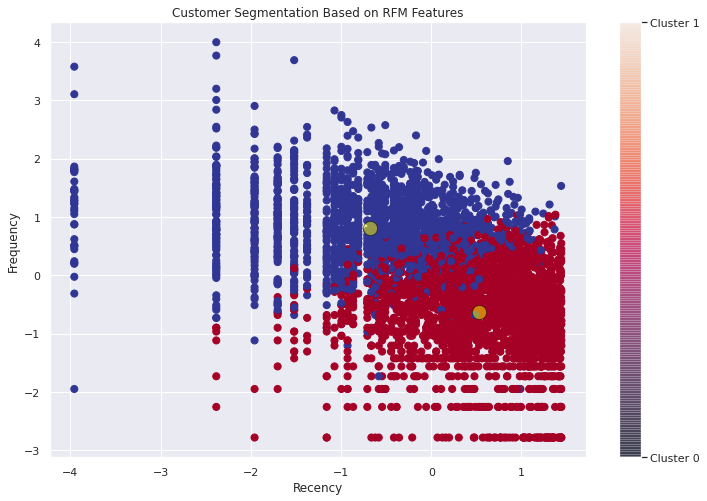

In [ ]:
# Visualization of customer segmentation based On RFM features. 
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

# **1.2 Elbow Method**

The elbow method is used to find the optimal number of clusters for KMeans clustering.
It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.
The elbow point on the plot corresponds to the optimal number of clusters that balances the trade-off between model complexity and data structure.

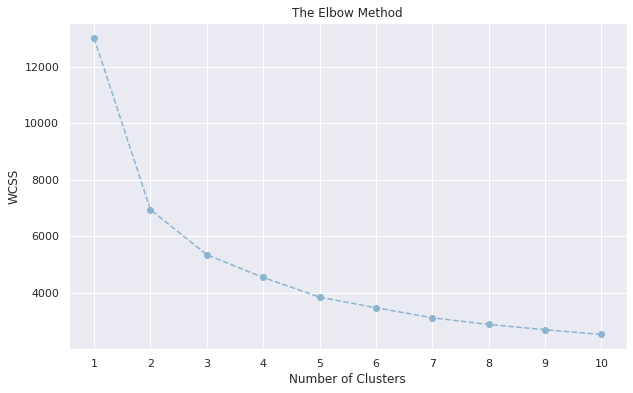

In [ ]:
# Input data X

wcss = []  # Initialize an empty list to store the WCSS values for different number of clusters

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [ ]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,1
1,12347.0,2,182,4310.00,4,4,4,444,0
2,12348.0,75,31,1797.24,2,2,4,224,1
3,12349.0,18,73,1757.55,3,3,4,334,0
4,12350.0,310,17,334.40,1,1,2,112,1
5,12352.0,36,85,2506.04,3,3,4,334,0
6,12353.0,204,4,89.00,1,1,1,111,1
7,12354.0,232,58,1079.40,1,3,3,133,1
8,12355.0,214,13,459.40,1,1,2,112,1
9,12356.0,22,59,2811.43,3,3,4,334,0


# **1.3 Agglomerative Hierarchial Clustering**

Agglomerative Hierarchical Clustering is a clustering algorithm that starts with each data point in its own cluster, and then merges the two closest clusters until only one remains, producing a tree-like structure. Different distance metrics and linkage criteria can be used to determine proximity between clusters. It is a popular and effective method for exploratory data analysis.

In [ ]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)

AgglomerativeClustering()

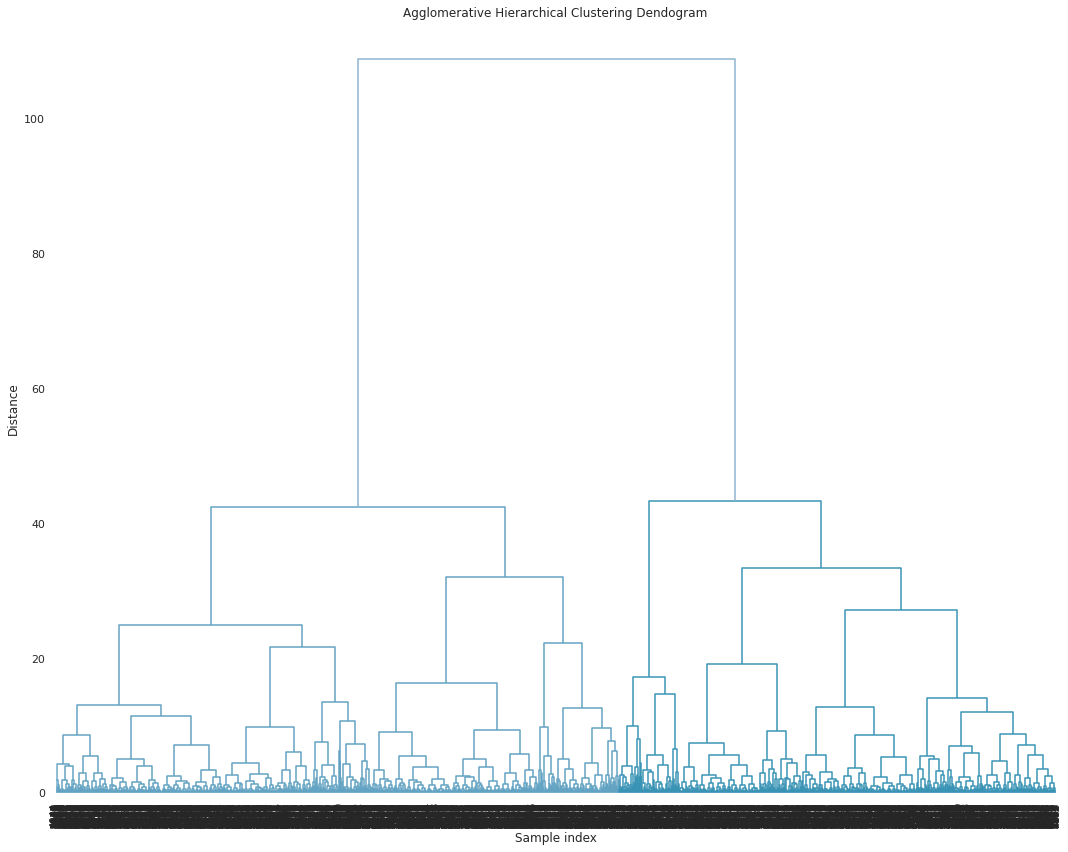

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

# **Summary Table**

In [ ]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
+--------+-------------------------------+------+---------------------------+


# **Conclusion**

## **1. EDA**

* Null values and duplicates were removed from the dataset before applying clustering.

* Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

* The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

* The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

* The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

* New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.

* The total amount of each order was calculated using the product of unit price and quantity.

* The months of November, October, December, September, and May generated the most business.

* The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.

* Most customers made purchases between 10:00 A.M. and 2:00 P.M.

* The top time duration for purchasing was found to be afternoon, followed by morning and evening.

# **2. Algorithm**

RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

Different clustering algorithms were applied to the dataset, including:
Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

* K-Means with Silhouette_score
* K-Means with Elbow Method
* Hierarchical Clustering

**Thank you!**